<a href="https://colab.research.google.com/github/khadijaatiq/ML-Algos/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     Size_SqFt  Bedrooms  Age_Years          Price
0  1748.357077         4         42  435386.244213
1  1430.867849         1         18  336097.978564
2  1823.844269         3          4  435818.417209
3  2261.514928         5         10  546891.290872
4  1382.923313         3         11  356455.570858
           Size_SqFt  Bedrooms  Age_Years     Price
Size_SqFt   1.000000 -0.028081   0.028463  0.981626
Bedrooms   -0.028081  1.000000  -0.063385  0.121276
Age_Years   0.028463 -0.063385   1.000000 -0.050310
Price       0.981626  0.121276  -0.050310  1.000000


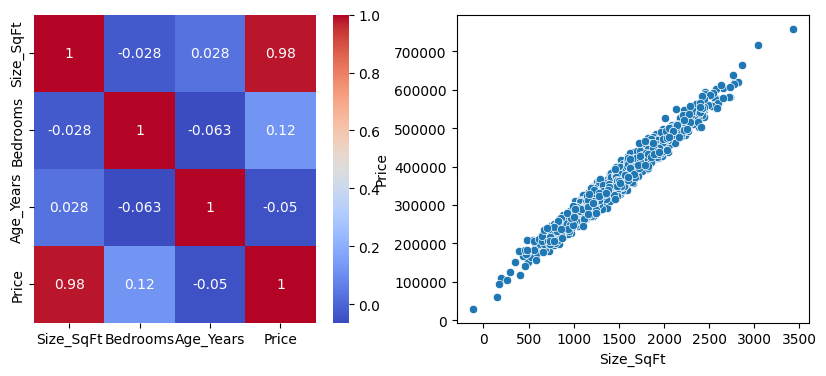

MAE: 7575.85
MSE: 89438446.81
RMSE: 9457.19
R2 Score: 0.9909


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# --- 1. Load/Create Data ---
# (In a real exam, use: df = pd.read_csv('filename.csv'))
np.random.seed(42)
n_samples = 1000
df = pd.DataFrame({
    'Size_SqFt': np.random.normal(1500, 500, n_samples),
    'Bedrooms': np.random.randint(1, 6, n_samples),
    'Age_Years': np.random.randint(0, 50, n_samples)
})
# Price = Base + Size*200 + Bed*10000 - Age*500 + Noise
df['Price'] = 50000 + (df['Size_SqFt'] * 200) + (df['Bedrooms'] * 10000) - (df['Age_Years'] * 500) + np.random.normal(0, 10000, n_samples)

# --- 2. EDA (Exploratory Data Analysis) ---
print(df.head())
print(df.corr())  # Check correlation

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm') # Heatmap
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['Size_SqFt'], y=df['Price'])   # Scatter Plot
plt.show()

# --- 3. Split Data ---
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 4. Train Model ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- 5. Evaluate (The Metrics) ---
y_pred = model.predict(X_test)

# Calculate Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")

Correlation Matrix:
               Size  Bedrooms       Age     Price
Size      1.000000  0.012960  0.031558  0.928361
Bedrooms  0.012960  1.000000 -0.034982  0.300687
Age       0.031558 -0.034982  1.000000 -0.067375
Price     0.928361  0.300687 -0.067375  1.000000


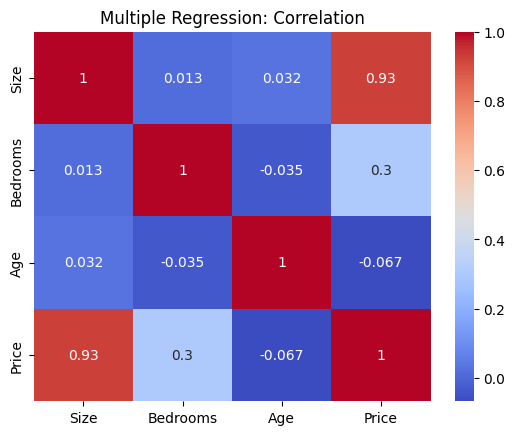


--- Multiple Regression Results ---
MSE: 115258138.47
R2 Score: 0.9475
Coefficients (Weights): [43642.16843436 13588.00792487 -4214.05485839]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Load Data (Synthetic Housing Data) ---
np.random.seed(42)
n_samples = 500
df = pd.DataFrame({
    'Size': np.random.normal(1500, 300, n_samples),
    'Bedrooms': np.random.randint(1, 6, n_samples),
    'Age': np.random.randint(0, 30, n_samples)
})
# Target = Base + Size*150 + Bed*10000 - Age*500 + Noise
df['Price'] = 50000 + (150 * df['Size']) + (10000 * df['Bedrooms']) - (500 * df['Age']) + np.random.normal(0, 10000, n_samples)

# --- 2. EDA (Exploratory Data Analysis) ---
print("Correlation Matrix:\n", df.corr())
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Multiple Regression: Correlation")
plt.show()

# --- 3. Preprocessing (Scaling) ---
# Scaling is crucial here because 'Size' (1500) and 'Bedrooms' (3) have vastly different scales.
X = df[['Size', 'Bedrooms', 'Age']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 4. Model Training ---
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# --- 5. Evaluation ---
y_pred = model.predict(X_test_scaled)

print("\n--- Multiple Regression Results ---")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"Coefficients (Weights): {model.coef_}")

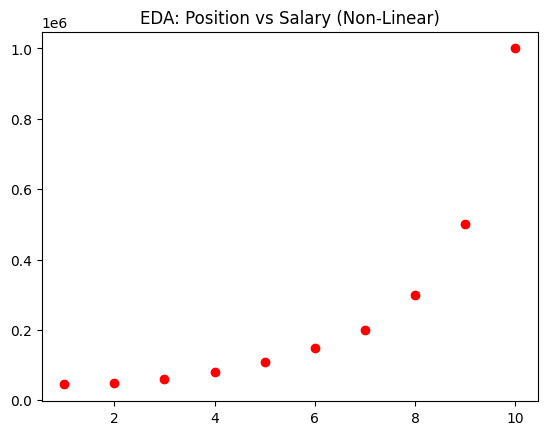

/tmp/ipython-input-991550347.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_poly), max(X_poly), 0.1).reshape(-1, 1)



--- Polynomial Regression Results ---
R2 Score: 0.9974


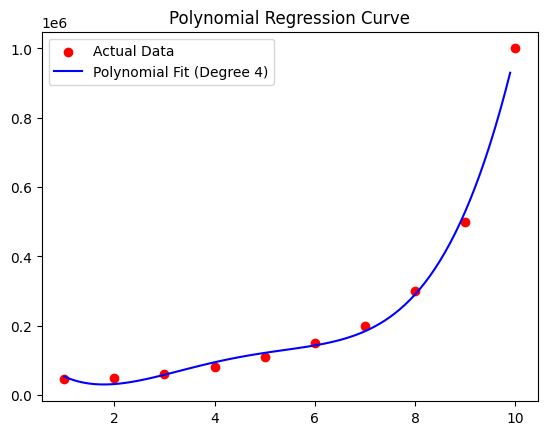

In [3]:
from sklearn.preprocessing import PolynomialFeatures

# --- 1. Load Data (Synthetic Salary Data) ---
# Scenario: Position Level (1-10) vs Salary (Exponential growth)
X_poly = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y_poly = np.array([45000, 50000, 60000, 80000, 110000, 150000, 200000, 300000, 500000, 1000000])

# --- 2. EDA ---
plt.scatter(X_poly, y_poly, color='red')
plt.title("EDA: Position vs Salary (Non-Linear)")
plt.show()

# --- 3. Preprocessing (Transform to Polynomial) ---
# This is the KEY step. We turn X into [1, X, X^2, X^3, X^4]
degree = 4
poly_reg = PolynomialFeatures(degree=degree)
X_poly_transformed = poly_reg.fit_transform(X_poly)

# --- 4. Model Training ---
# We fit a standard Linear Regression on the TRANSFORMED data
poly_model = LinearRegression()
poly_model.fit(X_poly_transformed, y_poly)

# --- 5. Evaluation & Visualization ---
# To plot a smooth curve, we create a fine grid of X values
X_grid = np.arange(min(X_poly), max(X_poly), 0.1).reshape(-1, 1)
X_grid_poly = poly_reg.transform(X_grid)
y_grid_pred = poly_model.predict(X_grid_poly)

print("\n--- Polynomial Regression Results ---")
print(f"R2 Score: {r2_score(y_poly, poly_model.predict(X_poly_transformed)):.4f}")

plt.scatter(X_poly, y_poly, color='red', label='Actual Data')
plt.plot(X_grid, y_grid_pred, color='blue', label=f'Polynomial Fit (Degree {degree})')
plt.title("Polynomial Regression Curve")
plt.legend()
plt.show()